In [1]:
import pandas as pd
import scanpy as sc 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import os,re
%load_ext rpy2.ipython

In [2]:
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/")

In [3]:
Organ_data =pd.read_csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/MetaData/SampleMeta.csv")
#

In [4]:
Organ_data.Week=Organ_data.Week-2

In [ ]:
Organ_data

In [6]:
Organ_data['AlmostWeek'] = Organ_data['Week']

In [ ]:
Organ_data3 =pd.read_csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/MetaData/Organmeta.csv")
Organ_data3

In [8]:
# Organ_data['Stimulation_bulk_rna']
Organ_data.rename(columns={'Stimulation_bulk_rna\t': 'Stimulation_bulk_rna'}, inplace=True)

In [9]:


def replace_values(x):
    if x == 1:
        return True
    elif x == 0:
        return False
    else:
        return x

# 应用函数到数据框的所有元素
Organ_data = Organ_data.applymap(replace_values)


In [ ]:
Organ_data

In [ ]:
Organ_data_noP5=Organ_data[~Organ_data.AdjustedID.str.contains('P6')].copy()
Organ_data_noP5

In [45]:
Organ_data_noP5.loc[33,'AlmostWeek']=10.5

In [43]:
Organ_data_noP5.loc[23,'AlmostWeek']=10.5

In [15]:
Organ_data_noP5.loc[31,'AlmostWeek']=24.1

In [16]:
Organ_data_noP5.loc[37,'AlmostWeek']=24.1

In [17]:
Organ_data_noP5.loc[27,'AlmostWeek']=24.1

In [18]:
Organ_data_noP5.loc[19,'AlmostWeek']=37.7

In [19]:
Organ_data_noP5.loc[19,'AlmostWeek']=37.7

In [38]:
Organ_data_noP5.loc[6,'AlmostWeek']=22.9

In [ ]:
# Organ_data_noP5.loc[1,'AlmostWeek']=22.9

In [34]:
# Organ_data_noP5.loc[20,'AlmostWeek']=38.3

In [ ]:
Organ_data_noP5

In [22]:
Organ_data_noP5.shape

(38, 11)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
`summarise()` has grouped output by 'AdjustedID', 'AlmostWeek'. You can
override using the `.groups` argument.


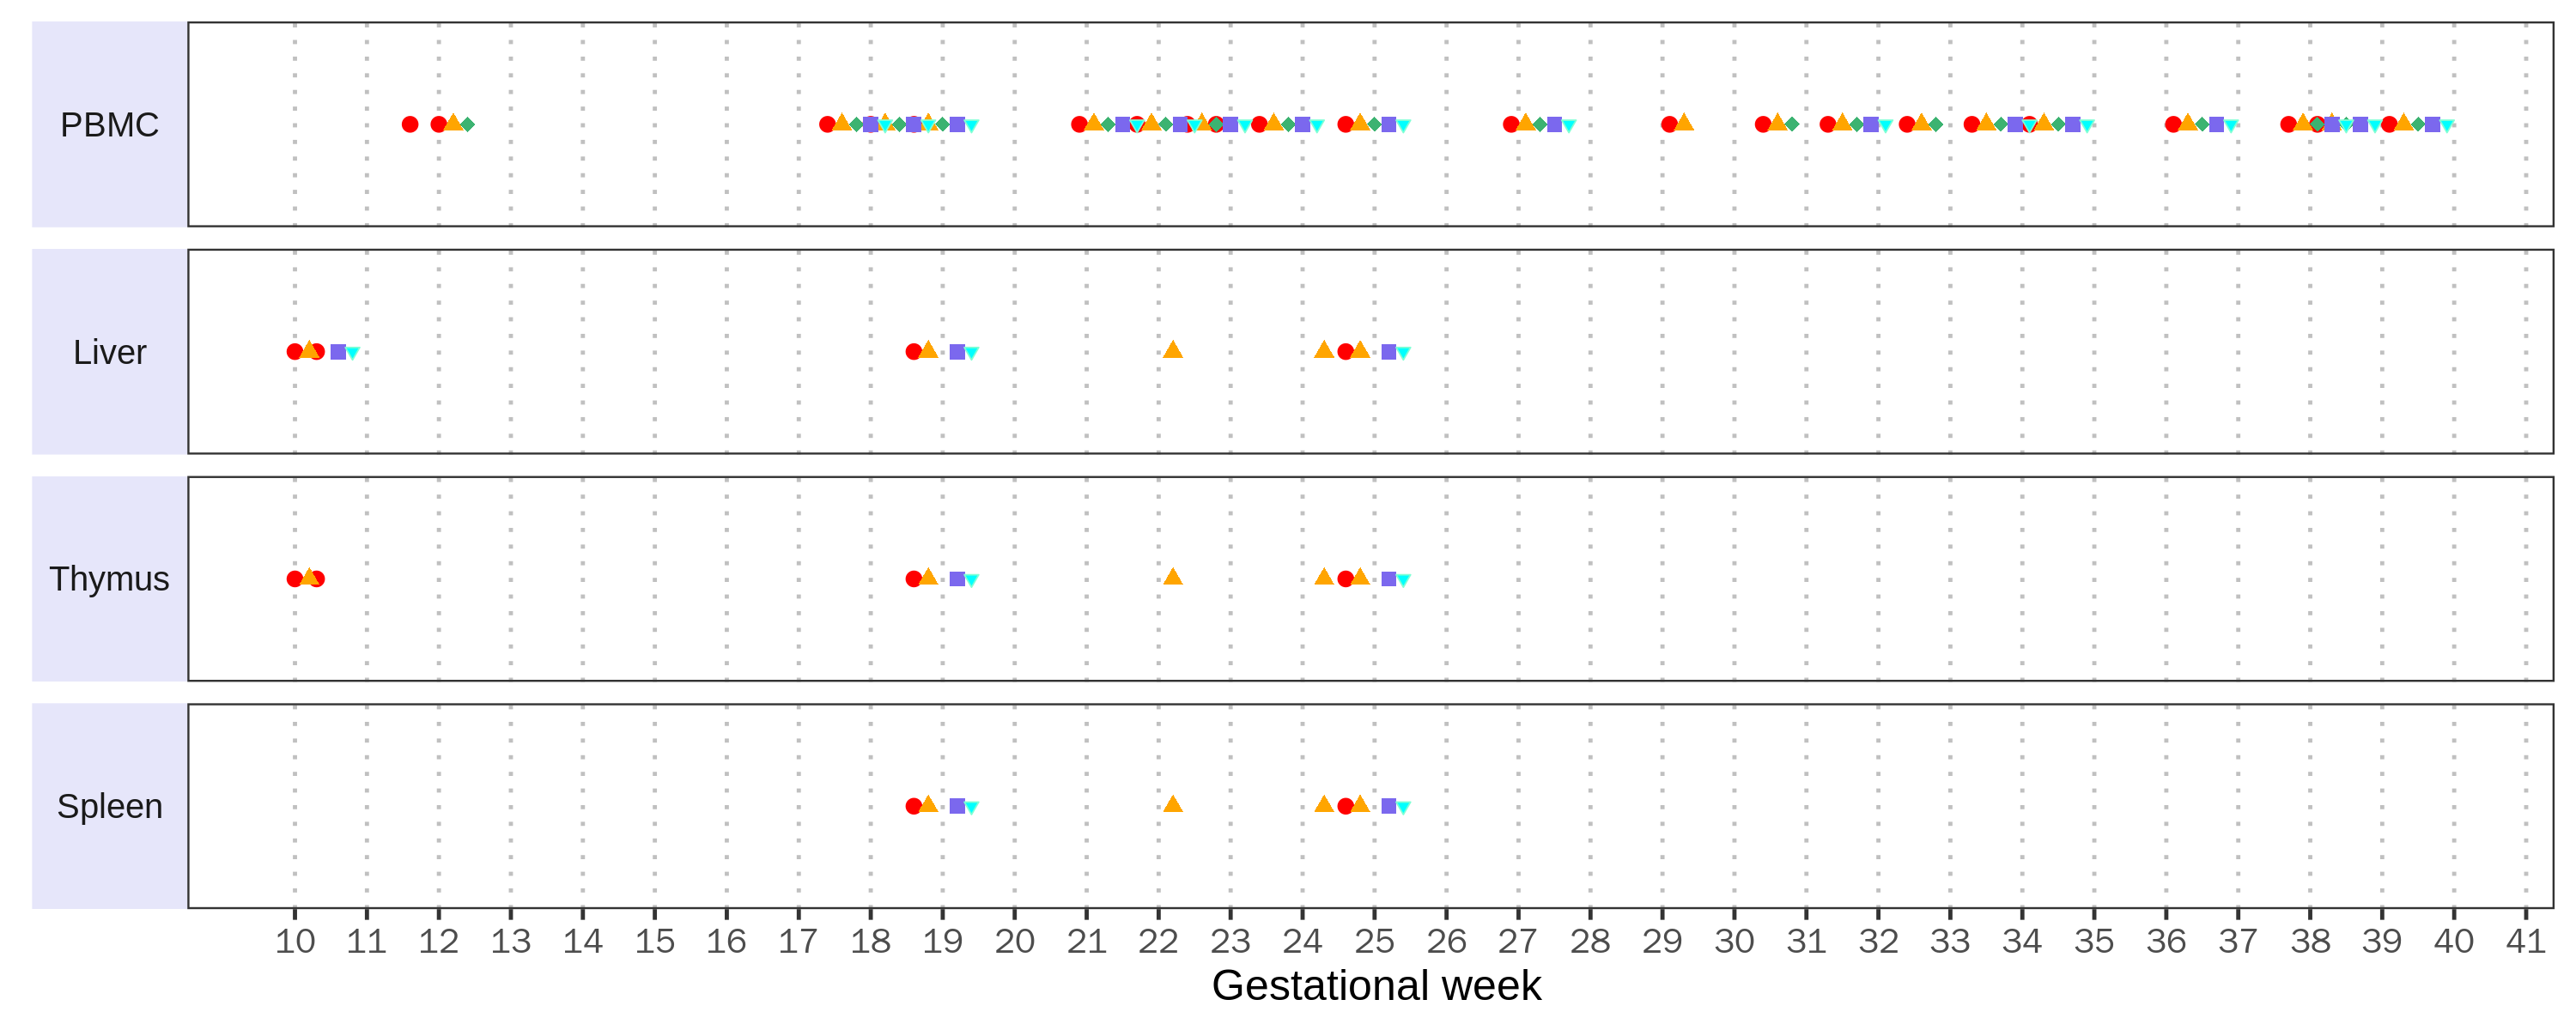

In [23]:
%%R -w 3000 -h 1200 -r 180 -i Organ_data_noP5
library(tidyverse)
P1=Organ_data_noP5  %>%
    group_by(AdjustedID, AlmostWeek,  Organ) %>%
    summarise(has_SCRNAseq = any(SCRNAseq), has_Spectral = any(Spectral_flow_cytometry),has_Plasma_Olink=any(Plasma_Olink),
              has_Olink_stimulation=any(Olink_stimulation),hasRNA=any(Stimulation_bulk_rna)
             )   %>%  ungroup() %>%
    arrange(AlmostWeek, AdjustedID, Organ) %>%
    mutate(donor = factor(AdjustedID, levels=unique(AdjustedID))) %>% group_by(donor) %>%
mutate(Organ = factor(Organ, levels=c('PBMC','Liver','Thymus','Spleen'))) %>%
    mutate(n_techs = sum(has_SCRNAseq, has_Spectral,has_Plasma_Olink, has_Olink_stimulation,hasRNA)) %>% ungroup() %>%
    arrange(n_techs) %>%
    group_by( Organ, AlmostWeek) %>%
    arrange(n_techs)%>% mutate(rank_donor=row_number()) %>%
    ggplot(aes(AlmostWeek, rank_donor)) + 
geom_point(data=. %>% filter( has_SCRNAseq), aes(AlmostWeek),color='#FF0000', size=3,width=0.4) +
    geom_point(data=. %>% filter( has_Spectral), aes(AlmostWeek+ 0.2), size=3, color='#FFA500',shape=17) +  
    geom_point(data=. %>% filter(has_Plasma_Olink), aes(AlmostWeek+ 0.4), size=3, color='#3CB371',shape=18) +
    geom_point(data=. %>% filter( has_Olink_stimulation), aes(AlmostWeek+ 0.6), size=3, color='#7B68EE',shape=15 )+
    geom_point(data=. %>% filter( hasRNA), aes(AlmostWeek+ 0.8), size=2, color='#7FFFD4',shape=25,fill='#00FFFF') +
    scale_y_continuous(expand=c(0.5,0.5)) +
    scale_x_continuous(breaks=seq(10,42)) +
    xlab(" Gestational week") +
    theme_bw(base_size=20) +
    
    scale_size(range=c(5,20), name="# cells") +
  theme(
    strip.text.y.left = element_text(angle=0),
    strip.background = element_rect(fill="#E6E6FA", color='NA'),
    axis.line.y = element_blank(), 
    panel.grid.major.x = element_line(linetype='dotted', color='#C0C0C0'),
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank(), 
    axis.title.y = element_blank(),
    panel.grid = element_blank()
)+
facet_grid(Organ~., scales="free", space="free", switch="both") 

P1

In [24]:
# %%R
# ggsave(plot=P1,'Figure1_2A/Figure1_2A_P1.pdf',width=16,height=8)

In [25]:
# mkdir -p Figure1_2A

In [26]:
pwd

'/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData'

`summarise()` has grouped output by 'AdjustedID', 'AlmostWeek'. You can
override using the `.groups` argument.


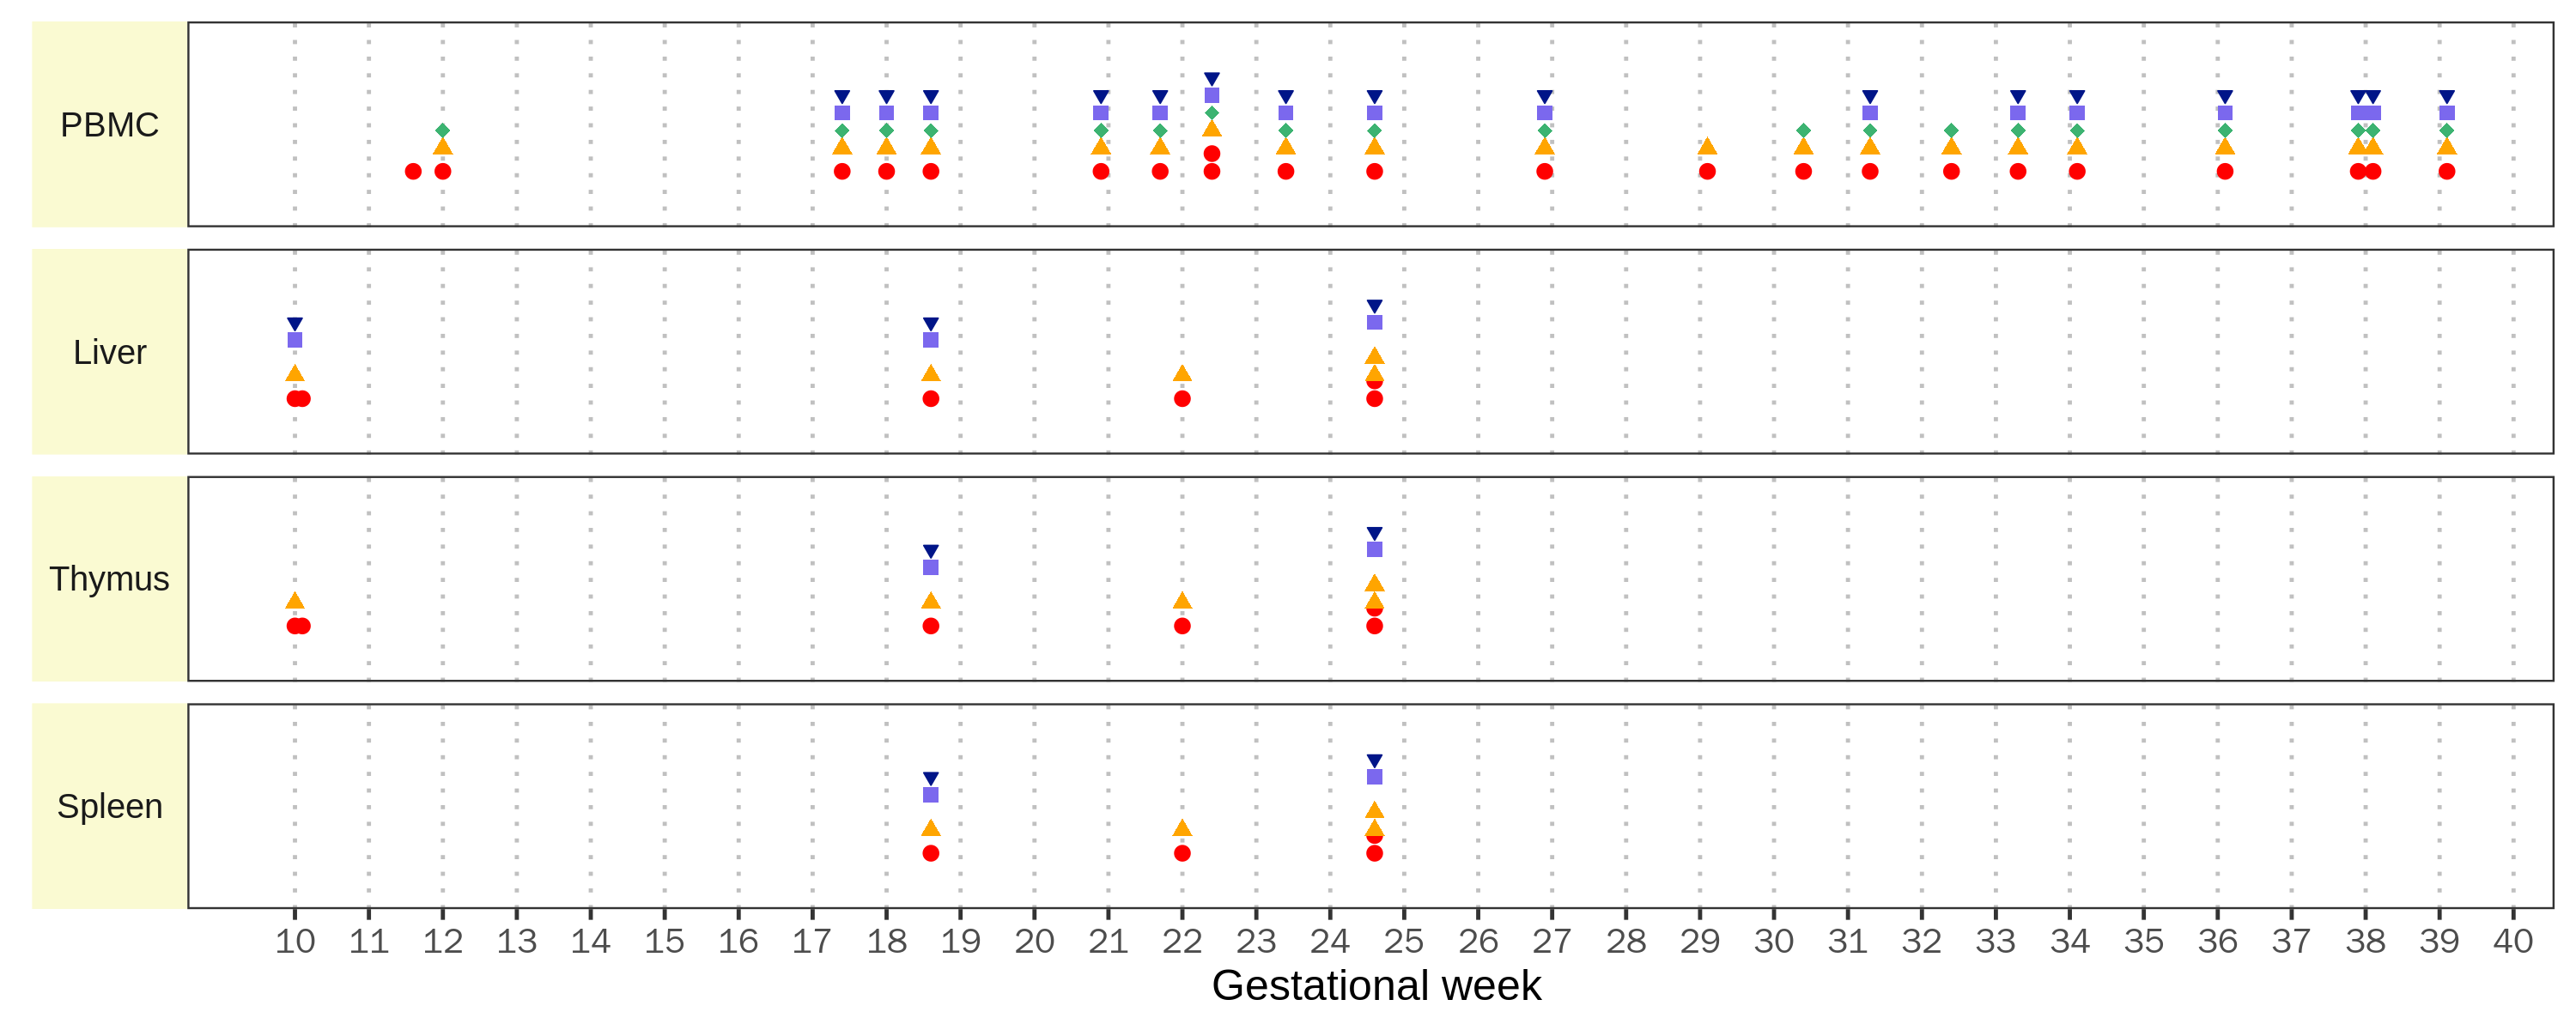

In [27]:
%%R -w 3000 -h 1200 -r 180 -i Organ_data
library(tidyverse)
P1=Organ_data  %>%
    group_by(AdjustedID, AlmostWeek,  Organ) %>%
    summarise(has_SCRNAseq = any(SCRNAseq), has_Spectral = any(Spectral_flow_cytometry),has_Plasma_Olink=any(Plasma_Olink),
              has_Olink_stimulation=any(Olink_stimulation),hasRNA=any(Stimulation_bulk_rna)
             )   %>%  ungroup() %>%
    arrange(AlmostWeek, AdjustedID, Organ) %>%
    mutate(donor = factor(AdjustedID, levels=unique(AdjustedID))) %>% group_by(donor) %>%
mutate(Organ = factor(Organ, levels=c('PBMC','Liver','Thymus','Spleen'))) %>%
    mutate(n_techs = sum(has_SCRNAseq, has_Spectral,has_Plasma_Olink, has_Olink_stimulation,hasRNA)) %>% ungroup() %>%
    arrange(n_techs) %>%
    group_by( Organ, AlmostWeek) %>%
    arrange(n_techs)%>% mutate(rank_donor=row_number()) %>%
    ggplot(aes(AlmostWeek, rank_donor-0.3)) + 
geom_point(color='#FF0000', size=3,width=0.4) +
    geom_point(data=. %>% filter( has_Spectral), aes(AlmostWeek, rank_donor+1), size=3, color='#FFA500',shape=17) +  
    geom_point(data=. %>% filter(has_Plasma_Olink), aes(AlmostWeek, rank_donor+2), size=3, color='#3CB371',shape=18) +
    geom_point(data=. %>% filter( has_Olink_stimulation), aes(AlmostWeek, rank_donor+3), size=3, color='#7B68EE',shape=15 )+
    geom_point(data=. %>% filter( hasRNA), aes(AlmostWeek, rank_donor+4), size=2, color="#001588",shape=25,fill="#001588") +
    scale_y_continuous(expand=c(0.5,0.5)) +
    scale_x_continuous(breaks=seq(10,42)) +
    xlab(" Gestational week") +
    theme_bw(base_size=20) +
    
    scale_size(range=c(5,20), name="# cells") +
  theme(
    strip.text.y.left = element_text(angle=0),
    strip.background = element_rect(fill="#FAFAD2", color='NA'),
    axis.line.y = element_blank(), 
    panel.grid.major.x = element_line(linetype='dotted', color='#C0C0C0'),
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank(), 
    axis.title.y = element_blank(),
    panel.grid = element_blank()
)+
facet_grid(Organ~., scales="free", space="free", switch="both") 

P1


`summarise()` has grouped output by 'AdjustedID', 'AlmostWeek'. You can
override using the `.groups` argument.


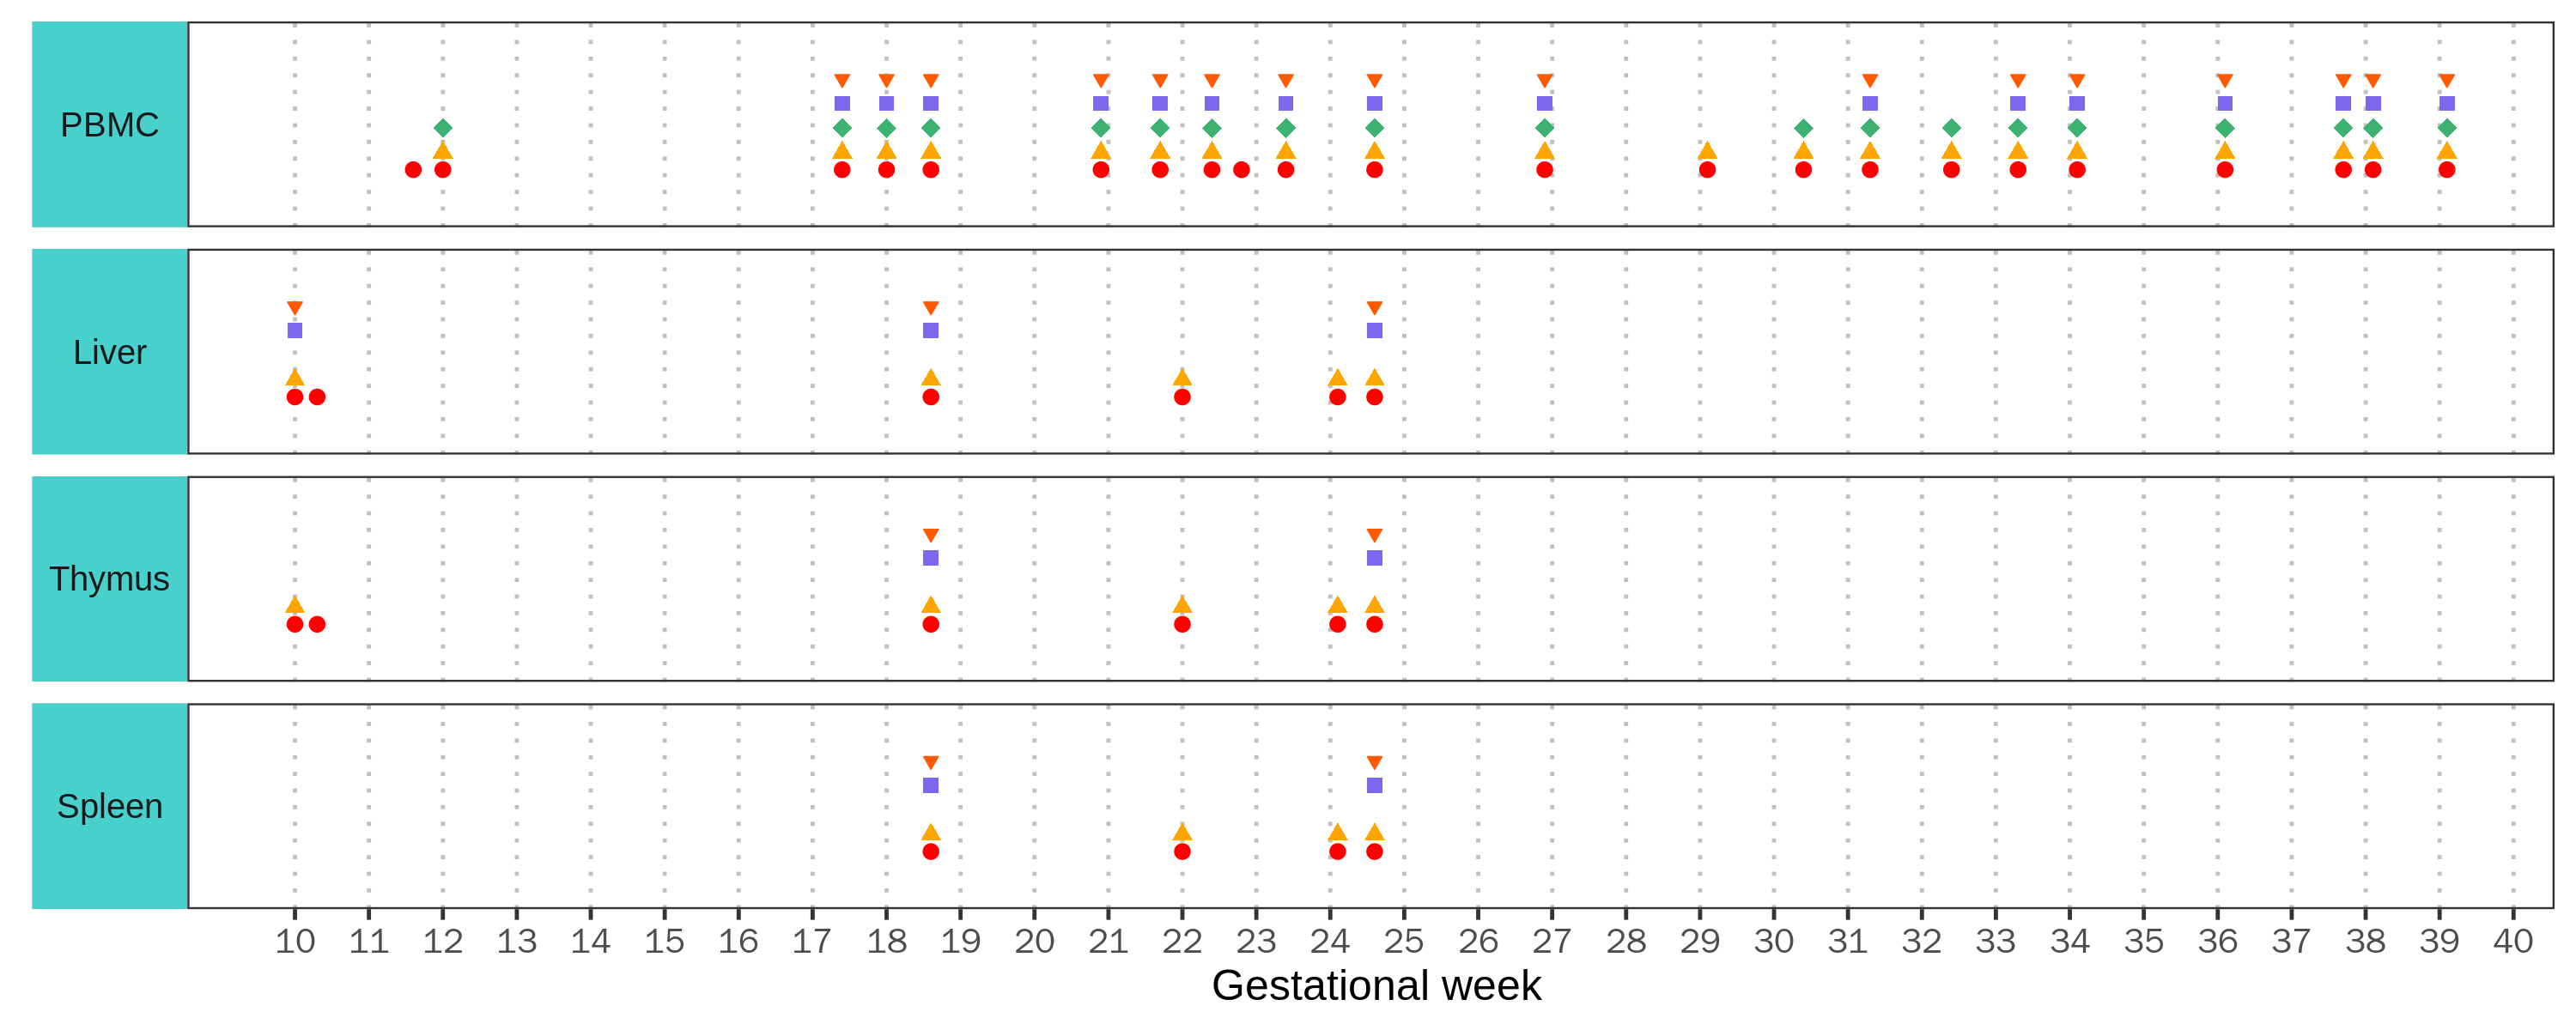

In [28]:
%%R -w 3000 -h 1200 -r 180 -i Organ_data_noP5
library(tidyverse)
P1=Organ_data_noP5  %>%
    group_by(AdjustedID, AlmostWeek,  Organ) %>%
    summarise(has_SCRNAseq = any(SCRNAseq), has_Spectral = any(Spectral_flow_cytometry),has_Plasma_Olink=any(Plasma_Olink),
              has_Olink_stimulation=any(Olink_stimulation),hasRNA=any(Stimulation_bulk_rna)
             )   %>%  ungroup() %>%
    arrange(AlmostWeek, AdjustedID, Organ) %>%
    mutate(donor = factor(AdjustedID, levels=unique(AdjustedID))) %>% group_by(donor) %>%
mutate(Organ = factor(Organ, levels=c('PBMC','Liver','Thymus','Spleen'))) %>%
    mutate(n_techs = sum(has_SCRNAseq, has_Spectral,has_Plasma_Olink, has_Olink_stimulation,hasRNA)) %>% ungroup() %>%
    arrange(n_techs) %>%
    group_by( Organ, AlmostWeek) %>%
    arrange(n_techs)%>% mutate(rank_donor=row_number()) %>%
    ggplot(aes(AlmostWeek, rank_donor+0.3)) + 
geom_point(color='#FF0000', size=3,width=1) +
    geom_point(data=. %>% filter( has_Spectral), aes(AlmostWeek, rank_donor+1), size=3, color='#FFA500',shape=17) +  
    geom_point(data=. %>% filter(has_Plasma_Olink), aes(AlmostWeek, rank_donor+2), size=4, color='#3CB371',shape=18) +
    geom_point(data=. %>% filter( has_Olink_stimulation), aes(AlmostWeek, rank_donor+3), size=3, color='#7B68EE',shape=15 )+
    geom_point(data=. %>% filter( hasRNA), aes(AlmostWeek, rank_donor+4), size=2, color="#FF5A00",shape=25,fill="#FF5A00") +
    scale_y_continuous(expand=c(0.5,0.5)) +
    scale_x_continuous(breaks=seq(10,42)) +
    xlab(" Gestational week") +
    theme_bw(base_size=20) +
    
    scale_size(range=c(5,20), name="# cells") +
  theme(
    strip.text.y.left = element_text(angle=0),
    strip.background = element_rect(fill="#48D1CC", color='NA'),
    axis.line.y = element_blank(), # 改变这里
    panel.grid.major.x = element_line(linetype='dotted', color='#C0C0C0'),
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank(), 
    axis.title.y = element_blank(),
    panel.grid = element_blank()
)+
facet_grid(Organ~., scales="free", space="free", switch="both") 

P1


`summarise()` has grouped output by 'AdjustedID', 'AlmostWeek'. You can
override using the `.groups` argument.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


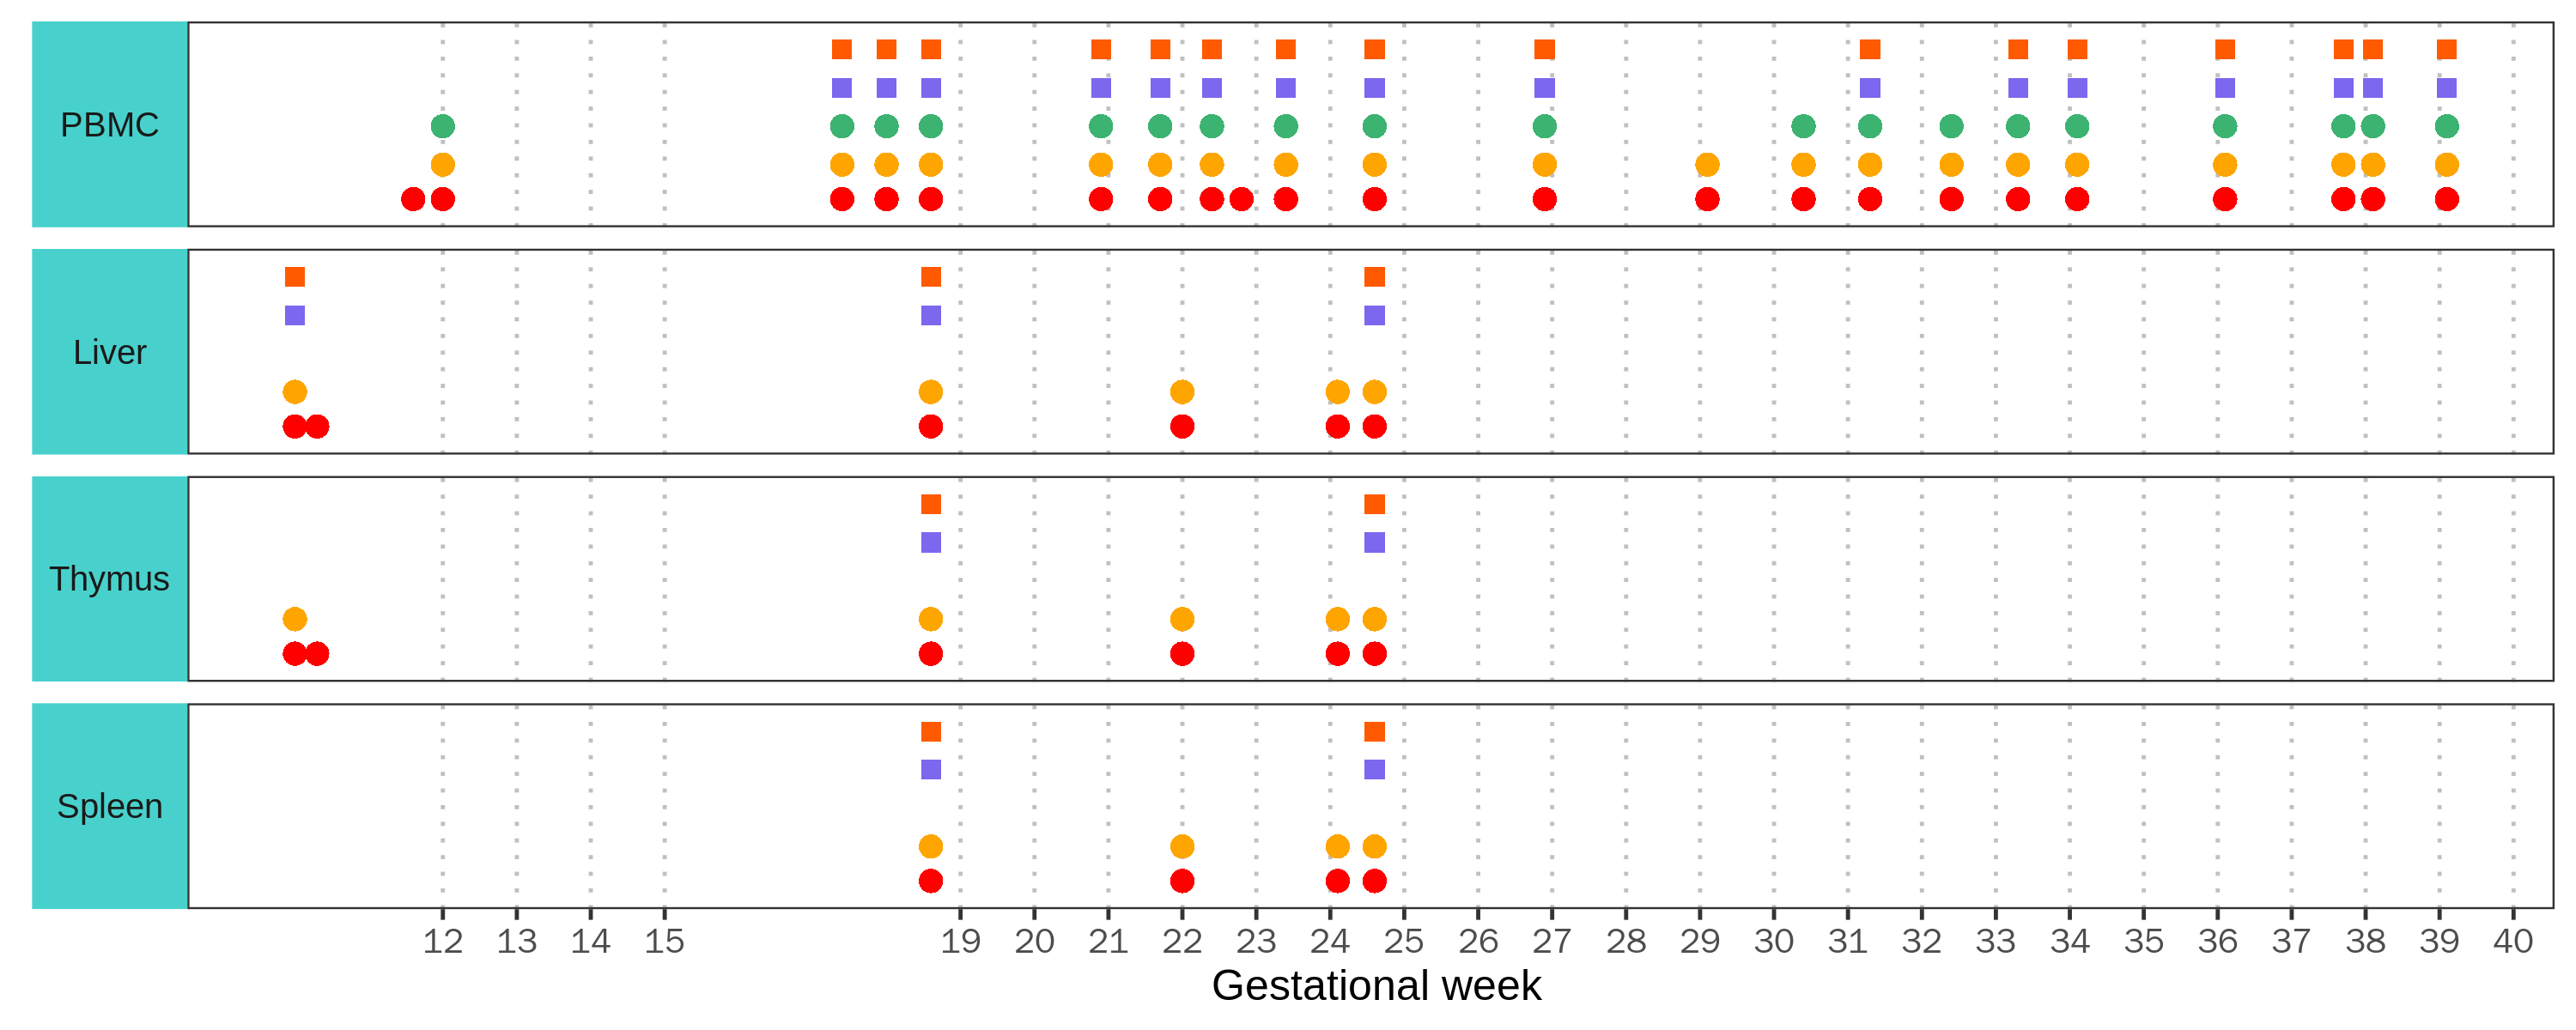

In [29]:
%%R -w 3000 -h 1200 -r 180 -i Organ_data_noP5
library(tidyverse)
P1=Organ_data_noP5  %>%
    group_by(AdjustedID, AlmostWeek,  Organ) %>%
    summarise(has_SCRNAseq = any(SCRNAseq), has_Spectral = any(Spectral_flow_cytometry),has_Plasma_Olink=any(Plasma_Olink),
              has_Olink_stimulation=any(Olink_stimulation),hasRNA=any(Stimulation_bulk_rna)
             )   %>%  ungroup() %>%
    arrange(AlmostWeek, AdjustedID, Organ) %>%
    mutate(donor = factor(AdjustedID, levels=unique(AdjustedID))) %>% group_by(donor) %>%
mutate(Organ = factor(Organ, levels=c('PBMC','Liver','Thymus','Spleen'))) %>%
    mutate(n_techs = sum(has_SCRNAseq, has_Spectral,has_Plasma_Olink, has_Olink_stimulation,hasRNA)) %>% ungroup() %>%
    arrange(n_techs) %>%
    group_by( Organ, AlmostWeek) %>%
    arrange(n_techs)%>% mutate(rank_donor=row_number()) %>%
    ggplot(aes(AlmostWeek, rank_donor+0.1)) +     scale_y_continuous(expand=c(0.5,0.5)) +
    scale_x_continuous(breaks=seq(10,42)) +
geom_point(color='#FF0000', size=5,width=1,shape=16) +
    geom_point(data=. %>% filter( has_Spectral), aes(AlmostWeek, rank_donor+1), size=5, width=1,color='#FFA500',shape=16) +  
    geom_point(data=. %>% filter(has_Plasma_Olink), aes(AlmostWeek, rank_donor+2), size=5, color='#3CB371',shape=16) +
    geom_point(data=. %>% filter( has_Olink_stimulation), aes(AlmostWeek, rank_donor+3), size=4, color='#7B68EE',shape=15 )+
    geom_point(data=. %>% filter( hasRNA), aes(AlmostWeek, rank_donor+4), size=4, color="#FF5A00",shape=15,fill="#FF5A00") +

    xlab(" Gestational week") +
    theme_bw(base_size=20) +
    
    scale_size(range=c(5,20), name="# cells") +
  theme(
    strip.text.y.left = element_text(angle=0),
    strip.background = element_rect(fill="#48D1CC", color='NA'),
    axis.line.y = element_blank(), # 改变这里
    panel.grid.major.x = element_line(linetype='dotted', color='#C0C0C0'),
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank(), 
    axis.title.y = element_blank(),
    panel.grid = element_blank()
)+
facet_grid(Organ~., switch="both") +scale_y_continuous(expand=c(0.15,0.15))+
 scale_x_continuous(breaks = c(12:15, 19:42))

P1


`summarise()` has grouped output by 'AdjustedID', 'AlmostWeek'. You can
override using the `.groups` argument.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


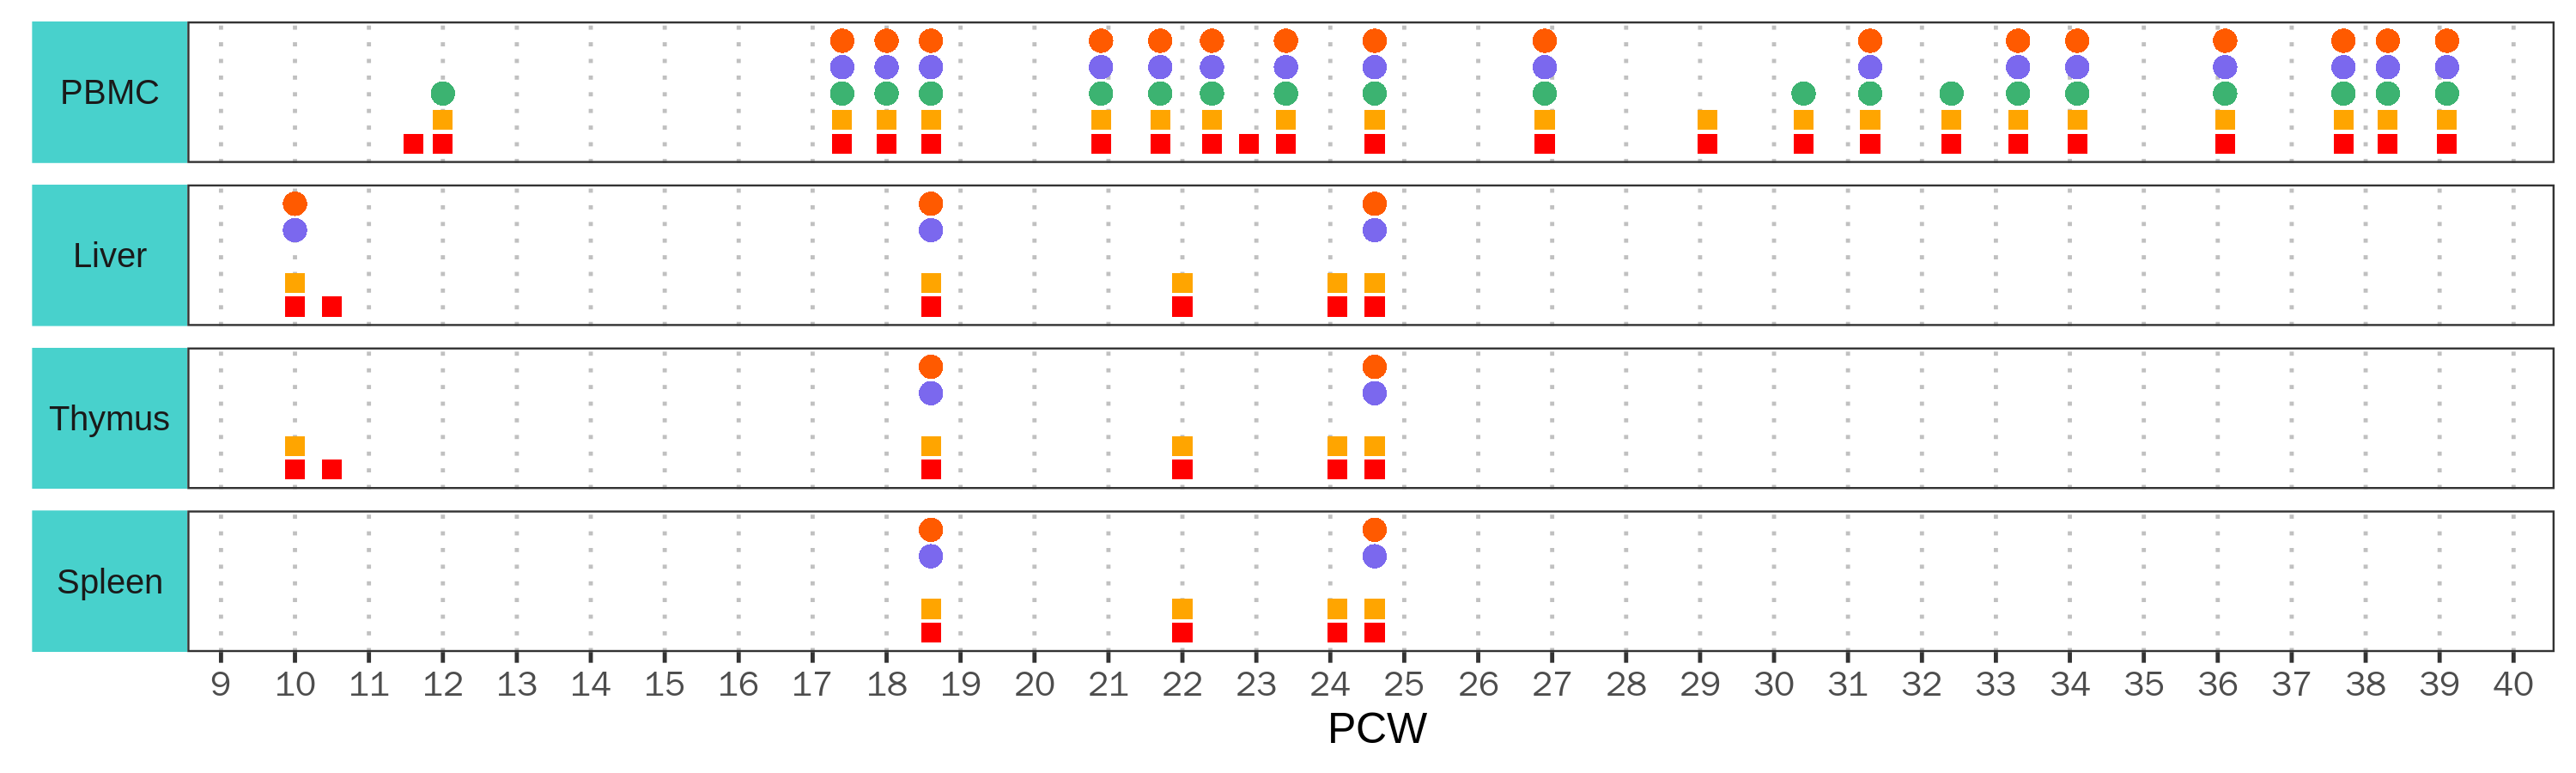

In [46]:
%%R -w 3000 -h 900 -r 180 -i Organ_data_noP5
library(tidyverse)
P1=Organ_data_noP5  %>%
    group_by(AdjustedID, AlmostWeek,  Organ) %>%
    summarise(has_SCRNAseq = any(SCRNAseq), has_Spectral = any(Spectral_flow_cytometry),has_Plasma_Olink=any(Plasma_Olink),
              has_Olink_stimulation=any(Olink_stimulation),hasRNA=any(Stimulation_bulk_rna)
             )   %>%  ungroup() %>%
    arrange(AlmostWeek, AdjustedID, Organ) %>%
    mutate(donor = factor(AdjustedID, levels=unique(AdjustedID))) %>% group_by(donor) %>%
mutate(Organ = factor(Organ, levels=c('PBMC','Liver','Thymus','Spleen'))) %>%
    mutate(n_techs = sum(has_SCRNAseq, has_Spectral,has_Plasma_Olink, has_Olink_stimulation,hasRNA)) %>% ungroup() %>%
    arrange(n_techs) %>%
    group_by( Organ, AlmostWeek) %>%
    arrange(n_techs)%>% mutate(rank_donor=row_number()) %>%
    ggplot(aes(AlmostWeek, rank_donor+0.1)) + 
geom_point(color='#FF0000', size=4,width=1,shape=15) +
    geom_point(data=. %>% filter( has_Spectral), aes(AlmostWeek, rank_donor+1), size=4, width=1,color='#FFA500',shape=15) +  
    geom_point(data=. %>% filter(has_Plasma_Olink), aes(AlmostWeek, rank_donor+2), size=5, color='#3CB371',shape=16) +
    geom_point(data=. %>% filter( has_Olink_stimulation), aes(AlmostWeek, rank_donor+3), size=5, color='#7B68EE',shape=16 )+
    geom_point(data=. %>% filter( hasRNA), aes(AlmostWeek, rank_donor+4), size=5, color="#FF5A00",shape=16,fill="#FF5A00") +
    scale_y_continuous(expand=c(0.5,0.5)) +
    scale_x_continuous(breaks=seq(9,40)) +
    xlab(" PCW") +
    theme_bw(base_size=20) +
    
    scale_size(range=c(5,20), name="# cells") +
  theme(
    strip.text.y.left = element_text(angle=0),
    strip.background = element_rect(fill="#48D1CC", color='NA'),
    axis.line.y = element_blank(), # 改变这里
    panel.grid.major.x = element_line(linetype='dotted', color='#C0C0C0'),
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank(), 
    axis.title.y = element_blank(),
    panel.grid = element_blank()
)+
facet_grid(Organ~., switch="both") +scale_y_continuous(expand=c(0.15,0.15))

P1


In [49]:
%%R
ggsave(plot=P1,'/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure1/Figure1B.pdf',width=14,height=6)